## Chapter5. 귀뚜라미 기온변화 예측

In [ ]:
# 라이브러리 임포트
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras import Sequential
from keras.layers import Dense

## 실습 5 - 귀뚜라미 온도계

실습내용: 귀뚜라미의 기온 변화를 예측하는 선형회귀 문제

1.  귀뚜라미 울음소리와 기온과의 상관관계를 구하기 위한 선형회귀 신경망 모델을 정의하고 신경망 훈련을 통해 관계식 구하기
2. EPOCH별 오차값과 훈련 데이터와 회귀식 시각화

In [ ]:
# 1. 판다스로 데이터 파일읽어오기
import pandas as pd

ds = pd.read_excel('cricket.xlsx')
ds.head()

xs = ds['X']
# Y값을 섭씨 온도로 변환
ys = (ds['Y']-32)*5/9

In [ ]:
# 훈련 데이터 시각화
pd.DataFrame({"xs":xs, "ys":ys})

,xs,ys
0,20.0,31.444444
1,16.0,22.000000
2,19.8,34.055556
3,18.4,29.055556
4,17.1,27.000000
5,15.5,24.000000
6,14.7,20.944444
7,17.1,27.777778
8,15.4,20.777778
9,16.2,28.500000


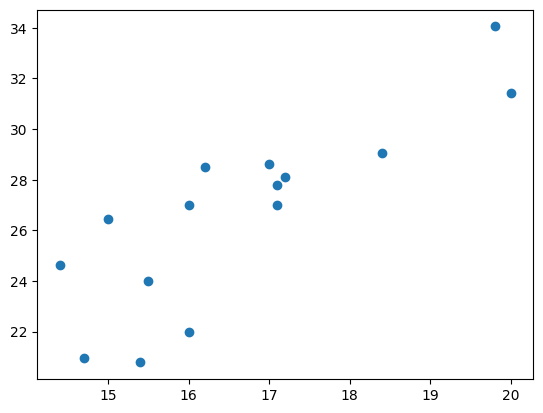

In [ ]:
plt.scatter(xs,ys)

In [ ]:
# 2. 뉴런 신경망 모델 정의
model = Sequential([
    Dense(1, input_shape=(1,), activation='linear')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# 3. 모델 컴파일 (옵티마이저와 손실함수 설정)
adam = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=adam, loss='mean_squared_error')

In [ ]:
# 4. 모델 훈련
history = model.fit(xs,ys, epochs=1000, verbose=1)

In [ ]:
# 5. 가중치 파라미터 확인
w, b = model.get_weights()
print(w,b)

[[1.4769613]] [2.146349]


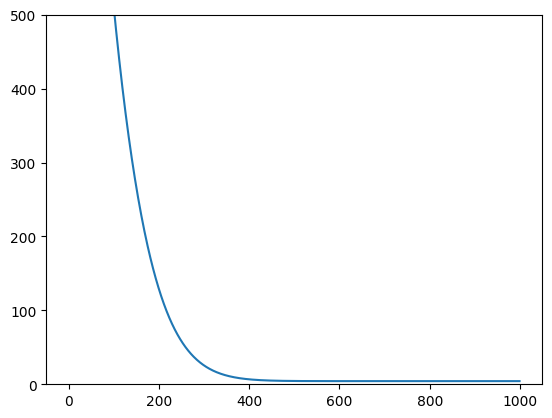

In [ ]:
# 6. 손실 오차 확인
loss = history.history['loss']
plt.plot(loss)
plt.ylim(0,500)
plt.show()

1/1 [==============================] - 0s 22ms/step


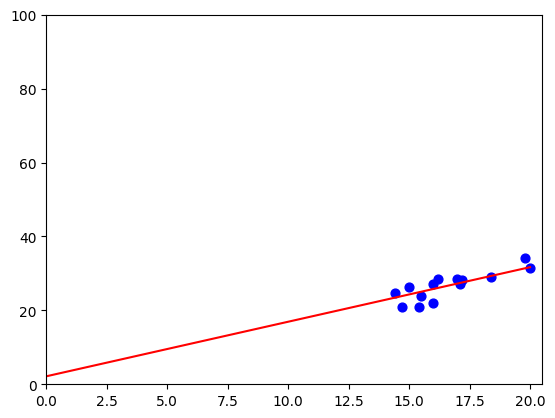

In [ ]:
# 7. 회귀선 확인
x = np.array([0,20])
y = model.predict(x)

plt.scatter(xs, ys, c='blue', s=40)
plt.plot(x,y,c='red')
plt.axis([0,20.5,0,100])
plt.show()

### **[결과해석]**


선형회귀 신경망 모델 훈련을 통해 얻은 가중치 파라미터 w, b 값은 [[1.4769613], [2.146349]] 이다.<br>
훈련데이터 값으로는 X값(input feature)은 귀뚜라미 울음소리를, Y값(output label)은 섭씨 온도 데이터를 입력하였고<br>
기온 값을 예측하기 위해서 선형회귀 신경망을 사용했고, 해당 신경망의 loss function은 MSE 를 사용하였다.

따라서, 귀뚜라미 울음소리와 기온과의 상관관계를 나타내는 선형회귀 관계식은
$y= 1.4769613x +2.146349$ 임을 확인할 수 있었다.



